## Click-through Rate
---
**Elo notes**

Click-through rate (CTR) is the ratio of users who click on a specific link to the number of total users who view a page, email, or advertisement. It is commonly used to measure the success of an online advertising campaign for a particular website as well as the effectiveness of email campaigns.

The purpose of click-through rates is to measure the ratio of clicks to impressions of an online ad or email marketing campaign. Generally the higher the CTR the more effective the marketing campaign has been at bringing people to a website.

The click-through rate of an advertisement is defined as the number of clicks on an ad divided by the number of times the ad is shown (impressions), expressed as a percentage. For example, if a banner ad is delivered 100 times (100 impressions) and receives one click, then the click-through rate for the advertisement would be 1%.


${\displaystyle {\text{CTR}}={{\text{Clicks}} \over {\text{Impressions}}}\times 100}$

Modern online advertising has moved beyond just using banner ads. Popular search engines allow advertisers to display ads in with the search results triggered by a search user. These ads are usually in text format and may include additional links and information like phone numbers, addresses and specific product pages. This additional information moves away from the poor user experience that can be created from intrusive banner ads and provides useful information to the search user, resulting in higher Click-through rates for this format of Pay Per Click Advertising. Having high click-through rate isn't the only goal for an online advertiser who will occasionally develop campaigns to raise awareness and sacrifice click-through rate for the overall gain of valuable traffic.

#### Estimating the Click-Through Rate for Ads

Search engine advertising has become a significant element of the Web browsing experience. Choosing the right ads for the query and the order in which they are displayed greatly affects the probability that a user will see and click on each ad. This ranking has a strong impact on the revenue the search engine receives from the ads. Further, showing the user an ad that they prefer to click on improves user satisfaction. For these reasons, there is an increasing interest in accurately estimating the click-through rate of ads in a recommender system.

In [202]:
from __future__ import division

import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as scis
import itertools as itt


%matplotlib inline

In [203]:
df = pd.read_csv('nyt_ctr.csv')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,458441.0,29.482551,23.607034,0.0,0.0,31.0,48.0,108.0
Gender,458441.0,0.367037,0.481997,0.0,0.0,0.0,1.0,1.0
Impressions,458441.0,5.007316,2.239349,0.0,3.0,5.0,6.0,20.0
Clicks,458441.0,0.092594,0.309973,0.0,0.0,0.0,0.0,4.0
Signed_In,458441.0,0.700930,0.457851,0.0,0.0,1.0,1.0,1.0


An impression (in the context of online advertising) is when an ad is fetched from its source, and is countable. Whether or not the ad is clicked is not taken into account. Each time an ad is fetched it is counted as one impression.

In [206]:
df.head(3)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1


In [207]:
(df.Impressions != 0).count()

458441

In [208]:
df['CTR'] = df.Clicks / df.Impressions

In [209]:
df = df.dropna(how='any')

In [210]:
df.head(3)

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0.0
1,73,1,3,0,1,0.0
2,30,0,3,0,1,0.0


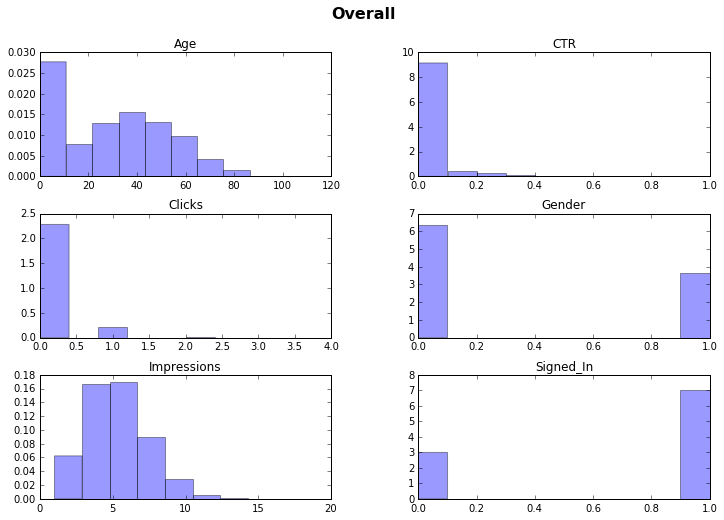

In [211]:
df.hist(figsize=(12, 8), grid=False, normed=True, alpha=.4);
plt.suptitle('Overall', size=16, weight='bold');

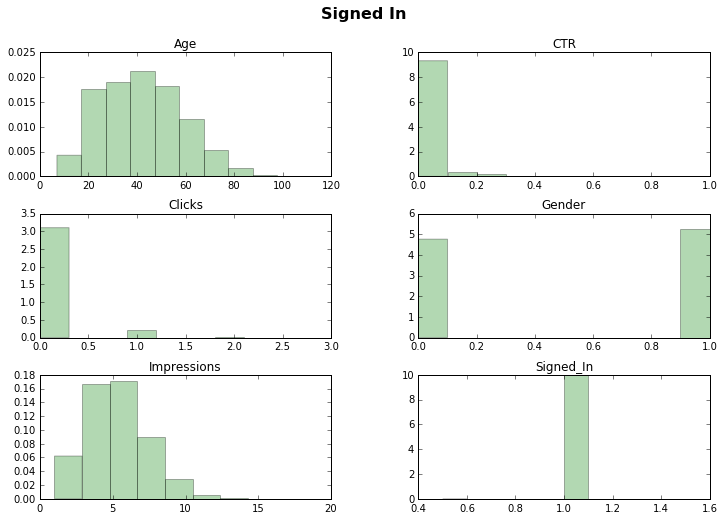

In [212]:
df[df.Signed_In == 1].hist(figsize=(12, 8), grid=False, normed= True, color='g', alpha=0.3)
plt.suptitle('Signed In', size=16, weight='bold');

[SciPy - Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html)

Significance level of 95% ($\alpha = 0.05$)

__Ho:__ 

__mean(Signed_In) = mean(Non-Signed_In)__



In [213]:
spys.ttest_ind(df[df.Signed_In == 1].CTR, df[df.Signed_In != 1].CTR, equal_var=False)

Ttest_indResult(statistic=-55.376117934260868, pvalue=0.0)

In [214]:
df[df.Signed_In == 1].CTR.mean()

0.01425363523213594

In [215]:
df[df.Signed_In != 1].CTR.mean()

0.028354907061657893

In [216]:
signed = df[df.Signed_In ==1].copy()

P-values it's lower that the significance level (alpha risk), therefore I reject my Ho

__Ho:__ 

__mean(Women) = mean(Men)__


In [217]:
scis.ttest_ind(signed[signed.Gender == 1].CTR, signed[signed.Gender != 1].CTR, equal_var=False)

Ttest_indResult(statistic=-3.2897560659351059, pvalue=0.0010028527313147612)

P-values it's lower that the significance level (alpha risk), therefore I reject my Ho

In [218]:
signed['AgeGroup'] = pd.cut(signed.Age, [7, 18, 24, 34, 44, 54,64, 1000])

In [219]:
signed.head()

,Age,Gender,Impressions,Clicks,Signed_In,CTR,AgeGroup
0,36,0,3,0,1,0.0,"(34, 44]"
1,73,1,3,0,1,0.0,"(64, 1000]"
2,30,0,3,0,1,0.0,"(24, 34]"
3,49,1,3,0,1,0.0,"(44, 54]"
4,47,1,11,0,1,0.0,"(44, 54]"


#### AB test 

Baseline: Significance level of 95% ($\alpha = 0.05$) 

By Bonferroni correction with the quantity of experiments

($\alpha = 0.05 / n-experiments$)


In [220]:
signed.groupby('AgeGroup')

In [221]:
grouped.groups.keys()

['(24, 34]',
 '(64, 1000]',
 '(7, 18]',
 '(18, 24]',
 '(34, 44]',
 '(44, 54]',
 '(54, 64]']

In [222]:
results = {'a':[], 'b':[], 'pvalue': [], 'difmean': []}
grouped = signed.groupby('AgeGroup')

for a, b in itt.combinations(grouped.groups.keys(), 2):
    # group names
    results['a'].append(a)
    results['b'].append(b)
    
    # a/b groups _temp
    agroup = grouped.get_group(a)
    bgroup = grouped.get_group(b)
    
    # ttest
    tmp = scis.ttest_ind(agroup['CTR'], bgroup['CTR'], equal_var=False)
    
    # results
    results['pvalue'].append(tmp.pvalue)
    results['difmean'].append(abs(agroup.CTR.mean() - bgroup.CTR.mean()))
    
df_ = pd.DataFrame(results)

In [223]:
df_[:3]

,a,b,difmean,pvalue
0,"(24, 34]","(64, 1000]",0.019656,7.860398e-285
1,"(24, 34]","(7, 18]",0.016439,7.449266e-146
2,"(24, 34]","(18, 24]",0.000426,2.136576e-01


In [224]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
a          21 non-null object
b          21 non-null object
difmean    21 non-null float64
pvalue     21 non-null float64
dtypes: float64(2), object(2)
memory usage: 744.0+ bytes


In [225]:
alpha = 0.5 / 21

In [226]:
df_[df_.pvalue < alpha].sort_values('difmean', ascending=False)

,a,b,difmean,pvalue
7,"(64, 1000]","(18, 24]",0.020082,2.458627e-272
9,"(64, 1000]","(44, 54]",0.019845,1.430923e-295
0,"(24, 34]","(64, 1000]",0.019656,7.860398e-285
8,"(64, 1000]","(34, 44]",0.019516,5.245541e-288
11,"(7, 18]","(18, 24]",0.016865,6.900980e-144
13,"(7, 18]","(44, 54]",0.016628,4.014382e-151
1,"(24, 34]","(7, 18]",0.016439,7.449266e-146
12,"(7, 18]","(34, 44]",0.016299,4.575147e-146
17,"(18, 24]","(54, 64]",0.010586,1.007813e-130
20,"(44, 54]","(54, 64]",0.010349,2.525271e-151


df shows the statistically significant results sorted by difference in CTR mean

Observations: 64+ group are the __most__ different from any othe group. 

Business insights: Target on tails 64+ and 18- 